# 1. Import and install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=1, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=1, circle_radius=2)
                             )
    
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=1)
                             )

In [6]:
cap = cv2.VideoCapture(0)

#Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        #Read Feed
        ret, frame = cap.read()
        
        #Make detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        
        #Draw Landmarks
        #draw_landmarks(image,results)
        
        #Draw Styled Landmarks
        draw_styled_landmarks(image,results)
        
        #Show to Screen
        cv2.imshow('OpenCV feed', image)
        
        #Breaking the Feed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows() 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.face_landmarks.landmark)

468

In [8]:
draw_landmarks(frame,results)

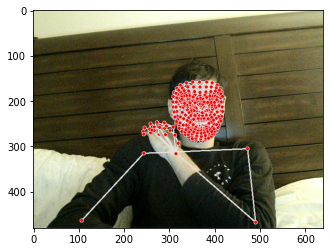

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,face,lh,rh])

In [12]:
result_test = extract_keypoints(results)[:-10]

In [13]:
np.save('0',result_test)

In [14]:
np.load('0.npy')

array([ 0.58325171,  0.47270018, -1.0413425 , ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [15]:
DATA_PATH = os.path.join('MP_Data')

#Actions
actions = np.array(['hello','thanks','iloveyou'])

#30 videos worth of data
no_sequences = 30

#30 frames
sequence_length = 30

In [16]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [17]:
cap = cv2.VideoCapture(0)

#Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #Loop through Actions
    for action in actions:
        #Loop through Videos
        for sequence in range(no_sequences):
            #Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
        
                #Read Feed
                ret, frame = cap.read()

                #Make detections
                image,results = mediapipe_detection(frame,holistic)
                print(results)
                

                #Draw Landmarks
                #draw_landmarks(image,results)

                #Draw Styled Landmarks
                draw_styled_landmarks(image,results)
                
                #Wait Logic
                if frame_num==0:
                    cv2.putText(image,'Starting Collection',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),4,cv2.LINE_AA)
                    cv2.waitKey(2000)
                
                else:
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),4,cv2.LINE_AA)

                #NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence), str(frame_num))
                np.save(npy_path,keypoints)
                
                #Show to Screen
                cv2.imshow('OpenCV feed', image)

                #Breaking the Feed
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows() 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create labels and Features

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
label_map = {label:num for num, label in enumerate(actions)}

In [20]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [21]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action, str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [22]:
np.array(sequences).shape

(90, 30, 1662)

In [23]:
np.array(labels).shape

(90,)

In [24]:
X = np.array(sequences)
X

array([[[ 0.50778508,  0.1943437 , -0.73626262, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.57119381,  0.41398612, -1.03729272, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.59696728,  0.41792473, -0.94338942, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.62826645,  0.47437748, -0.94479305, ...,  0.33174819,
          0.27609146, -0.03880963],
        [ 0.62805337,  0.47291285, -0.94248646, ...,  0.36695325,
          0.29661611, -0.04323006],
        [ 0.62518239,  0.47285846, -0.93603009, ...,  0.3671124 ,
          0.29927188, -0.04082838]],

       [[ 0.61593342,  0.47752512, -0.92534149, ...,  0.3184312 ,
          0.28270739, -0.03059255],
        [ 0.61772847,  0.48956478, -0.92032492, ...,  0.35067743,
          0.24671724, -0.03681524],
        [ 0.62074244,  0.49047783, -0.90579164, ...,  0.35031235,
          0.24898495, -0.03755143],
        ...,
        [ 0.60896319,  0.51184982, -0.90487373, ...,  

In [25]:
X.shape

(90, 30, 1662)

In [26]:
y = to_categorical(labels).astype(int)

In [27]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.05)

# 7. Build and Train LSTM Neural Network

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [30]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [31]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [32]:
res = [.2,0.7,.01]

In [33]:
actions[np.argmax(res)]

'thanks'

In [34]:
model.compile(optimizer = 'Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [35]:
model.fit(x_train,y_train,epochs = 2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 223ms/step - loss: 1.0844 - categorical_accuracy: 0.3465
Epoch 2/2000
3/3 [==============================] - 0s 61ms/step - loss: 3.2447 - categorical_accuracy: 0.2369
Epoch 3/2000
3/3 [==============================] - 0s 52ms/step - loss: 37.9921 - categorical_accuracy: 0.2114
Epoch 4/2000
3/3 [==============================] - 0s 53ms/step - loss: 10.6013 - categorical_accuracy: 0.3484
Epoch 5/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0580 - categorical_accuracy: 0.3485
Epoch 6/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.8361 - categorical_accuracy: 0.2779
Epoch 7/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.2126 - categorical_accuracy: 0.2681
Epoch 8/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.4396 - categorical_accuracy: 0.2075
Epoch 9/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0934 - categorical_accuracy: 0.430

3/3 [==============================] - 0s 50ms/step - loss: 0.4281 - categorical_accuracy: 0.6811
Epoch 147/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.4225 - categorical_accuracy: 0.7377
Epoch 148/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.4151 - categorical_accuracy: 0.7847
Epoch 149/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.4314 - categorical_accuracy: 0.7397
Epoch 150/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.4581 - categorical_accuracy: 0.7045
Epoch 151/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.4316 - categorical_accuracy: 0.7338
Epoch 152/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.4327 - categorical_accuracy: 0.6927
Epoch 153/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.4322 - categorical_accuracy: 0.6927
Epoch 154/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.4408 - categorical_accuracy: 0.675

3/3 [==============================] - 0s 55ms/step - loss: 0.4357 - categorical_accuracy: 0.7123
Epoch 291/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.4367 - categorical_accuracy: 0.7201
Epoch 292/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4442 - categorical_accuracy: 0.7123
Epoch 293/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4660 - categorical_accuracy: 0.7006
Epoch 294/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.4503 - categorical_accuracy: 0.7240
Epoch 295/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.4505 - categorical_accuracy: 0.6811
Epoch 296/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.4233 - categorical_accuracy: 0.7162
Epoch 297/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4535 - categorical_accuracy: 0.6811
Epoch 298/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4259 - categorical_accuracy: 0.727

3/3 [==============================] - 0s 60ms/step - loss: 0.3123 - categorical_accuracy: 0.8611
Epoch 435/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.3407 - categorical_accuracy: 0.8121
Epoch 436/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.3870 - categorical_accuracy: 0.7731
Epoch 437/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.2495 - categorical_accuracy: 0.8904
Epoch 438/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2739 - categorical_accuracy: 0.8963
Epoch 439/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1892 - categorical_accuracy: 0.9667
Epoch 440/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1700 - categorical_accuracy: 0.9648
Epoch 441/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1944 - categorical_accuracy: 0.9119
Epoch 442/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2693 - categorical_accuracy: 0.878

3/3 [==============================] - 0s 58ms/step - loss: 0.4768 - categorical_accuracy: 0.6986
Epoch 579/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4748 - categorical_accuracy: 0.7534
Epoch 580/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4748 - categorical_accuracy: 0.7515
Epoch 581/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4807 - categorical_accuracy: 0.7143
Epoch 582/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4780 - categorical_accuracy: 0.7417
Epoch 583/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4536 - categorical_accuracy: 0.7163
Epoch 584/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4760 - categorical_accuracy: 0.7338
Epoch 585/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4657 - categorical_accuracy: 0.7573
Epoch 586/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4526 - categorical_accuracy: 0.735

3/3 [==============================] - 0s 60ms/step - loss: 0.0556 - categorical_accuracy: 1.0000
Epoch 723/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0295 - categorical_accuracy: 0.9941
Epoch 724/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0354 - categorical_accuracy: 0.9902
Epoch 725/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0261 - categorical_accuracy: 1.0000
Epoch 726/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0271 - categorical_accuracy: 0.9941
Epoch 727/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0181 - categorical_accuracy: 0.9941
Epoch 728/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0295 - categorical_accuracy: 1.0000
Epoch 729/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0215 - categorical_accuracy: 0.9902
Epoch 730/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0278 - categorical_accuracy: 0.982

3/3 [==============================] - 0s 55ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 867/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 869/2000
3/3 [==============================] - 0s 57ms/step - loss: 8.3861e-04 - categorical_accuracy: 1.0000
Epoch 870/2000
3/3 [==============================] - 0s 57ms/step - loss: 8.3562e-04 - categorical_accuracy: 1.0000
Epoch 871/2000
3/3 [==============================] - 0s 55ms/step - loss: 7.4667e-04 - categorical_accuracy: 1.0000
Epoch 872/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 873/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.4533e-04 - categorical_accuracy: 1.0000
Epoch 874/2000
3/3 [==============================] - 0s 58ms/step - loss: 5.4060e-04 - categor

KeyboardInterrupt: 

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [37]:
res = model.predict(x_test)

In [38]:
actions[np.argmax(res[1])]

'iloveyou'

In [39]:
actions[np.argmax(y_test[1])]

'iloveyou'

# 9. Save Weights

In [40]:
model.save('action.h5')

In [41]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [42]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [43]:
yhat = model.predict(x_test)

In [44]:
ytrue = np.argmax(y_test,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()

In [45]:
multilabel_confusion_matrix(yhat,ytrue)

array([[[0, 0],
        [0, 5]]], dtype=int64)

In [46]:
accuracy_score(ytrue,yhat)

1.0

# 11. Testing in Real Time

In [59]:
# colors = [(245,117,16),(117,245,16),(16,117,245)]
# def prob_viz(res,actions,input_frame,colors):
#     output_frame = input_frame.copy()
#     for num,prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40),colors[num], -1)
#         cv2.putText(output_frame,actions[num],(0,85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2,cv2.LINE_AA)
#     return output_frame

In [60]:
# plt.imshow(prob_viz(res, actions, image,colors))

In [61]:
res[np.argmax(res)]

1.0

In [66]:
#New Detection Variables
sequence = []
sentence = []
threshold = .4

cap = cv2.VideoCapture(0)
#Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        #Read Feed
        ret, frame = cap.read()
        
        #Make detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        
        #Draw Landmarks
        #draw_landmarks(image,results)
        
        #Draw Styled Landmarks
        draw_styled_landmarks(image,results)
        
        #Prediciton Logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
#         sequence.append(keypoints)
#         sequence=sequence [-30:]
    
    
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])
        
        #Visualization
        if np.all(res[np.argmax(res)]) > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
        
        if len(sentence)>5:
            sentence = sentence[-5:]
        
        
        #Viz probability
        #image = prob_viz(res,actions,image,colors)
        
            
        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(image, ' '.join(sentence),(3,30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2,cv2.LINE_AA)
        
        #Show to Screen
        cv2.imshow('OpenCV feed', image)
        
        #Breaking the Feed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows() 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [181]:
cap.release()
cv2.destroyAllWindows() 